#Exploration of Sonoma County Animal Shelter Data



By Siya Adrekar, Delight Lee, and Haider Syed

11/4/22


## Introduction

The Sonoma Animal Shelter is an animal hospital and shelter in Sonoma California that is responsible for over 4000 rescues and adoptions per year. We will be analyzing and comparing data of the Sonoma Animal Shelter collected by the Sonoma Department of Health Services in February, 2017.

Within this data set, we will be specifically looking at the qualities of dogs and cats that have the highest chance to be adopted, and which of them get returned to their owners the most.

This data set was gathered by the county of Sonoma Department of Health Services. We will be looking at what are the main factors of a pet being adopted or returned to their owner. Some of these factors include but are not limited to: Sex, Breed, Size, and Age.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import date
import warnings

## Initial Data Exploration

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-2022.csv')

This dataset contains total of 22108 rows and 24 columns.

Some of the column name meanings weren not clear just by the names, but they can be found at [Sonoma County Government site](https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw).

Most columns are of type object.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22108 entries, 0 to 22107
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  16406 non-null  object 
 1   Type                  22108 non-null  object 
 2   Breed                 22108 non-null  object 
 3   Color                 22108 non-null  object 
 4   Sex                   22108 non-null  object 
 5   Size                  22075 non-null  object 
 6   Date Of Birth         16709 non-null  object 
 7   Impound Number        22108 non-null  object 
 8   Kennel Number         22099 non-null  object 
 9   Animal ID             22108 non-null  object 
 10  Intake Date           22108 non-null  object 
 11  Outcome Date          21972 non-null  object 
 12  Days in Shelter       22108 non-null  int64  
 13  Intake Type           22108 non-null  object 
 14  Intake Subtype        22108 non-null  object 
 15  Outcome Type       

This is an exploration of a few rows of the data.

The asterisk in some of the values in the name column indicates that the names were given by shelter staff.

In [ ]:
df.head(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,04/11/2014,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,07/24/2020,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,08/04/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,01/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1


Here are the total number of NA values in the data set.

In [ ]:
df.isna().sum().sum()

21806

The data seems to contain a lot of NA values so we may need to clean it depending on what it is.

Below is the number of columns with  NA values.

In [ ]:
df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False)

Name                    5702
Date Of Birth           5399
Outcome Zip Code        3184
Location                3184
Outcome Jurisdiction    3105
Outcome Condition        471
Outcome Subtype          441
Outcome Type             142
Outcome Date             136
Size                      33
Kennel Number              9
dtype: int64

The Name column contains the most NA values. However, it is not used in our analysis, so it won't affect our result.

Here is the basic statistics for numerical columns 'Day in Shelter', and 'Outcome Zip Code', and 'Count'.


In [ ]:
df.describe().round(2)

,Days in Shelter,Outcome Zip Code,Count
count,22108.00,18924.00,22108.00
mean,17.52,95006.55,1.00
std,34.42,3863.69,0.05
min,0.00,1922.00,0.00
25%,1.00,95401.00,1.00
50%,8.00,95404.00,1.00
75%,22.00,95436.00,1.00
max,1239.00,99701.00,1.00


It appears that 'Days in Shelter' has many unique values; we may want to consider it as continuous. On the other hand, the 'Count' column has only 2 values; we may want to consider it as a categorical value.

We looked at the number of unique values per column.

In [ ]:
df[['Days in Shelter', 'Type','Breed','Color','Sex','Size','Outcome Type','Outcome Subtype','Intake Type','Intake Subtype','Intake Condition','Outcome Condition']].nunique()

Days in Shelter      262
Type                   3
Breed                977
Color                327
Sex                    5
Size                   7
Outcome Type           9
Outcome Subtype      227
Intake Type            7
Intake Subtype        29
Intake Condition       5
Outcome Condition      6
dtype: int64

It appears that 'Days in Shelter' has many unique values because it's numeric, and sex column looks unsual having 5 different types. Despite 'Breed' and 'Color' having many unique values, they are categorical values.

Since the sex column has 5 different types, here's how many of each different type we have.

Text(0, 0.5, 'percentage')

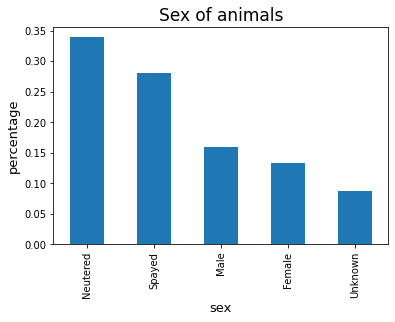

In [ ]:
df['Sex'].value_counts(normalize = True).plot.bar();
plt.title('Sex of animals', fontsize = 17)
plt.xlabel('sex', fontsize=13)
plt.ylabel('percentage', fontsize=13)

The animal shelter categorized the sex column assuming animals have been spayed, neutered, and capable of reproduction. The unknown category contains animals whose gender was unable to be determined. We will combine neutered with male and spayed with female in our analysis below, as those factors are not needed for the analysis.

There are 3 main categories of animals in the data set: dogs, cats, and other.

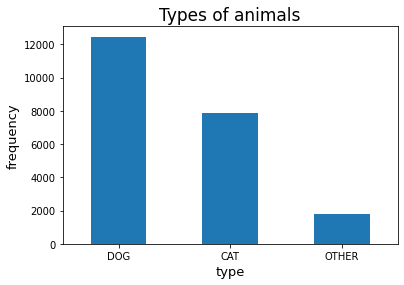

In [ ]:
df['Type'].value_counts().plot.bar()
plt.title('Types of animals', fontsize=17)
plt.xlabel('type',fontsize=13)
plt.xticks(rotation = 0)
plt.ylabel('frequency',fontsize=13);

It appears that our data primarily consists of dogs. For our report, we will be focusing exclusively on dogs and cats, as they form a large majority of the animals in the data set.


Here's a specific list of the intake types and intake subtypes that we will be using. We are only looking at types larger than 50.

In [ ]:
stray_or_return = df[(df['Intake Type'] == 'STRAY') | (df['Intake Type'] == 'ADOPTION RETURN')]
stray_or_return.groupby('Intake Type')['Intake Subtype'].value_counts().loc[lambda x : x>50]

Intake Type      Intake Subtype  
ADOPTION RETURN  OVER THE COUNTER     353
STRAY            FIELD               8139
                 OVER THE COUNTER    5412
                 COMM CAT            1270
                 PHONE                452
                 VET_HOSP             400
                 BORN_HERE            193
                 PRIV_SHELT           184
                 MUN_SHELT             67
Name: Intake Subtype, dtype: int64

There's only one intake subtype for adoption return, which is over the counter.

We are looking at specific subtypes for the outcome types above 50 as well.



In [ ]:
adopt_or_return = df[(df['Outcome Type'] == 'ADOPTION') | (df['Outcome Type'] == 'RETURN TO OWNER')]
adopt_or_return.groupby('Outcome Type')['Outcome Subtype'].value_counts().loc[lambda x : x>50]

Outcome Type     Outcome Subtype        
ADOPTION         WALKIN                     3234
                 SCAS WEB                   1133
                 INTERNET                    848
                 WESTFARM                    422
                 REFERRAL                    278
                 SPEC EVENT                  186
                 REFERRAL-O                   98
                 49ER PET                     83
                 FINDER                       79
                 FB SCAS                      70
                 VOLUNTEER                    66
                 REFERRAL-F                   57
                 MOB EVENT                    56
RETURN TO OWNER  OVER THE COUNTER_WEB       1523
                 OVER THE COUNTER_PRVS      1299
                 OVER THE COUNTER_CALL       761
                 OVER THE COUNTER_MCHIP      758
                 FLD_MCHIP                   526
                 OVER THE COUNTER_WALKIN     472
                 COMMCAT    

There are many ways that animals are being adopted and returned.

## Data cleaning and preprocessing

We will be droping the columns that we are not going to use for this report.

In [ ]:
unnecessaryC = ['Name', 'Impound Number', 'Kennel Number', 'Intake Jurisdiction', 'Outcome Jurisdiction', 'Outcome Zip Code', 'Location', 'Count']
df.drop(columns = unnecessaryC, inplace=True)

This is how many columns have the value "0" present in their data.

In [ ]:
(df == 0).sum().sort_values(ascending = False).head(5)

Days in Shelter    4143
Type                  0
Breed                 0
Color                 0
Sex                   0
dtype: int64

It seems that only column that has 0 value is 'Days in Shelter'. This can be explained by animals leaving the shelter less than a day.

First, we will clean our data by dropping rows with NA values.

In [ ]:
df.dropna(axis=0, inplace = True)

Next, we will also drop values that we cannot interpret such as unknown or other.

In [ ]:
df = df[df['Sex']!='Unknown']
df = df[df['Type']!='OTHER']

Since we are going to use dates, we will change the date columns into pandas date time index objects as those are easier to work with.

In [ ]:
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])

As explained above in the introduction, we are combining neutered into male and spayed into female.

In [ ]:
df['Sex'].replace('Neutered', 'Male', inplace = True)
df['Sex'].replace('Spayed', 'Female', inplace=True)

## Data exploration and visualization

###What characteristics of dogs and cats are the most likely to be adopted?

We will create initial dataframes

In [ ]:
adopted_pets = df[df['Outcome Type'] == 'ADOPTION']
adopted_dogs = adopted_pets[adopted_pets['Type'] == 'DOG']
adopted_cats = adopted_pets[adopted_pets['Type'] == 'CAT']

What sex of the dogs and cats are adopted more?

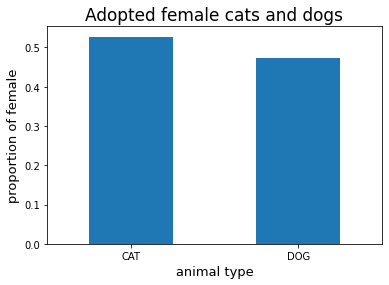

In [ ]:
adopted_female_pets = adopted_pets[['Type','Sex']][(adopted_pets['Sex'] == 'Female')]
pd.crosstab(adopted_female_pets['Type'], adopted_female_pets['Sex'], normalize=True).plot.bar(legend=False)
plt.title('Adopted female cats and dogs', fontsize=17)
plt.xlabel('animal type', fontsize = 13)
plt.ylabel('proportion of female', fontsize = 13)
plt.xticks(rotation = 0);

There doesn't seem to be a significant different in the ratio between male and female for both cats and dogs. Therefore, it appears that the sex isn't a determinant factor in an adoption choice.

How long do cats and dogs stay in the shelter before they are adopted?

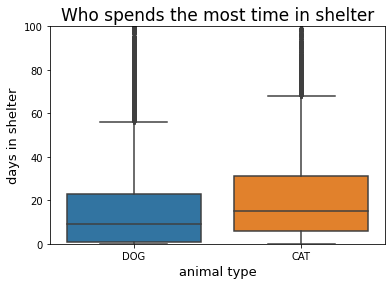

In [ ]:
sns.boxplot(x='Type', y='Days in Shelter', data=df)
plt.ylim(0,100)
plt.title('Who spends the most time in shelter', fontsize=17)
plt.xlabel('animal type', fontsize = 13)
plt.ylabel('days in shelter', fontsize = 13);

The median amount of time a dog spends in the Sonoma Animal Shelter is about 6 days, where as the median number of days a cat spends is 19. Cats seem to stay in the shelter longer than dogs.

What breeds of dogs are adopted more?

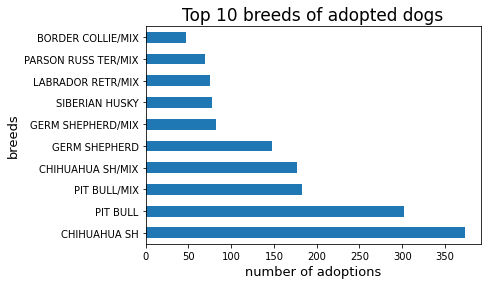

In [ ]:
top10_d = adopted_dogs['Breed'].value_counts().head(10).index
adopted_dog_breeds_top10 = adopted_dogs[adopted_dogs['Breed'].isin(top10_d)]
adopted_dog_breeds_top10['Breed'].value_counts().plot.barh()
plt.title('Top 10 breeds of adopted dogs', fontsize=17)
plt.xlabel('number of adoptions', fontsize=13)
plt.ylabel('breeds', fontsize=13)
plt.xticks(rotation = 0);

The trend appears to be that the most common adopted dogs are Chihuahuas and Pit bulls. Overall, it seems more likely smaller dog breeds are more likely adopted, compared to breeds such as Huskies, Labradors, and German Shepherds.

What breeds of cats are adopted more?

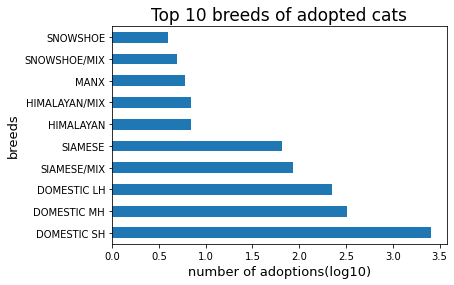

In [ ]:
top10_c = adopted_cats['Breed'].value_counts().head(10).index
adopted_cat_breeds_top10 = adopted_cats[adopted_cats['Breed'].isin(top10_c)]
adopted_cat_breeds_top10['Breed'].value_counts().apply(np.log10).plot.barh()
plt.title('Top 10 breeds of adopted cats', fontsize=17)
plt.xlabel('number of adoptions(log10)', fontsize=13)
plt.ylabel('breeds', fontsize=13)
plt.xticks(rotation = 0);


Unlike dog breeds, cat breeds have much less to differentiate themselves. Typically, the only difference in cat breeds are the color of hair and the length. Despite the lack of physical variation in species, domestic Shorthair cats are almost exclusively chosen to be adopted.

Does the age of the dog affect the adoption rate?

need to clean up the unknown
or just plot things above 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


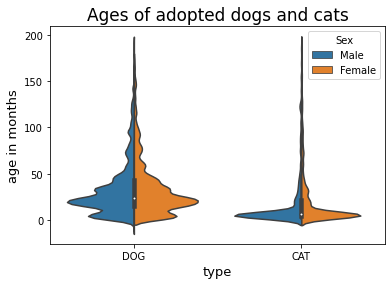

In [ ]:
def calculateAge(birthDate, intakeDate):
    if(intakeDate.year == birthDate.year):
      age_in_months = intakeDate.month
    else:
      age_in_months = (birthDate.year - intakeDate.year)*12 + intakeDate.month
    return age_in_months
adopted_pets['Ages_in_months'] = adopted_pets.apply(lambda x: calculateAge(x['Intake Date'], x['Date Of Birth']), axis=1)
sns.violinplot(x='Type', y='Ages_in_months', hue='Sex', split=True, bw=0.1, data=adopted_pets)
warnings.filterwarnings('ignore')
plt.title('Ages of adopted dogs and cats', fontsize=17)
plt.xlabel('type', fontsize=13)
plt.xticks(rotation = 0)
plt.ylabel('age in months',fontsize=13);

Interpretation

Which colors of dogs are adopted the most

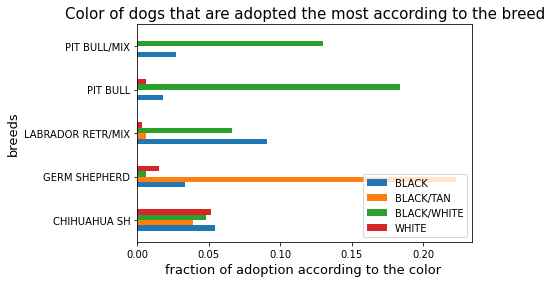

In [ ]:
top5_color= df['Color'].value_counts()[0:5].index
adopted_dogs_colort5 = adopted_dogs[adopted_dogs['Color'].isin(top5_color)]
top5_d = adopted_dogs_colort5['Breed'].value_counts().head(5).index
pd.crosstab(adopted_dogs_colort5['Breed'][adopted_dogs_colort5['Breed'].isin(top5_d)],adopted_dogs_colort5['Color'], normalize = True ).plot.barh()
plt.title('Color of dogs that are adopted the most according to the breed', fontsize = 15)
plt.xlabel('fraction of adoption according to the color ', fontsize = 13)
plt.ylabel('breeds', fontsize=13)
plt.legend(loc ='lower right');

This plot tells which colors of dogs are preferred by the people while adopting the dogs according to their breed. Here we can see the adoption rate of Germ Shephered is high whose color of black/tan

What colors of cats are adopted the most

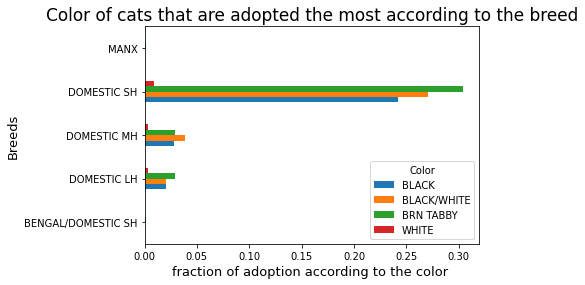

In [ ]:
top5_color= df['Color'].value_counts()[0:5].index
adopted_cats_colort5 = adopted_cats[adopted_cats['Color'].isin(top5_color)]
top5_c = adopted_cats_colort5['Breed'].value_counts().head(5).index
pd.crosstab(adopted_cats_colort5['Breed'][adopted_cats_colort5['Breed'].isin(top5_c)],adopted_cats_colort5['Color'], normalize = True ).plot.barh()
plt.title('Color of cats that are adopted the most according to the breed', fontsize = 17)
plt.xlabel('fraction of adoption according to the color ', fontsize = 13)
plt.ylabel('Breeds', fontsize=13);


This plot tells which colors of cats are preferred by the people while adopting the cats according to their breed. Here we can see the adoption rate of domestic short hair (SH) is high whose color is Brown Tabby

What size of pets are adopted more?

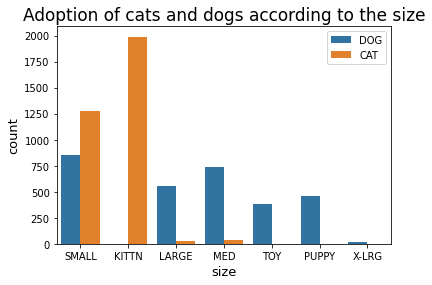

In [ ]:
sns.countplot(x="Size", hue="Type", data=adopted_pets);
plt.legend(loc ='upper right')
plt.title('Adoption of cats and dogs according to the size', fontsize = 17)
plt.xlabel('size', fontsize = 13)
plt.ylabel('count', fontsize=13);


This plot gives us the over all view of what size of cats and dogs are adopted the most acoording to their size

what size of dogs are adopted the most

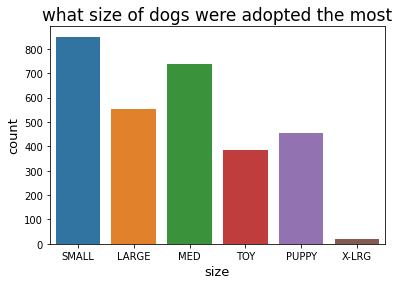

In [ ]:
sns.countplot(x="Size", data=adopted_dogs)
plt.title('what size of dogs were adopted the most', fontSize=17)
plt.xlabel('size', fontsize = 13)
plt.ylabel('count', fontsize=13);

There is quite a bit of variety when it comes to the size of adopted dogs. Unlike breeds, while smaller dogs are still the most popular selection, puppies are still less popular than keeping larger dogs.

what size of cats are adopted the most

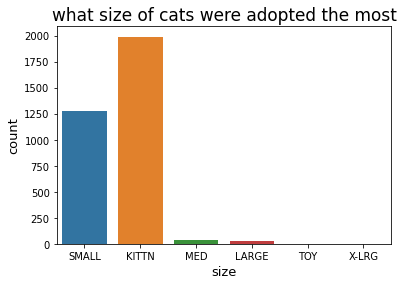

In [ ]:
sns.countplot(x="Size", data=adopted_cats)
plt.title('what size of cats were adopted the most')
plt.title('what size of cats were adopted the most', fontSize=17)
plt.xlabel('size', fontsize = 13)
plt.ylabel('count', fontsize=13);

Unlike dogs, the size of adopted cats is much more homogenous. Cats in general have less variety in size comapared to dogs, and yet people seem to only want to adopt cats when they are smaller and younger. Kittens exclusively seem to be the most popular selection among cats.

###How do the pets get returned to the owner?

In [ ]:
lost_pets_returned = df[(df['Intake Type'] == 'STRAY')&(df['Outcome Type'] == 'RETURN TO OWNER')]
lost_dogs = lost_pets_returned[lost_pets_returned['Type'] == 'DOG']
lost_cats = lost_pets_returned[lost_pets_returned['Type'] == 'CAT']

How often are the pet getting lost multiple times?

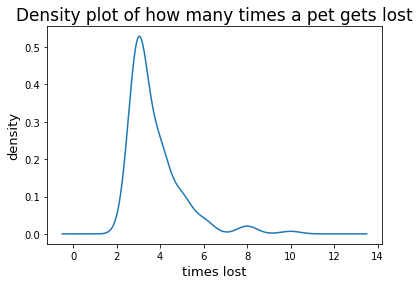

In [ ]:
lost_pets_returned.groupby('Type')['Animal ID'].value_counts().loc[lambda x : x>2].plot.density()
plt.title('Density plot of how many times a pet gets lost', fontsize = 17)
plt.xlabel('times lost', fontsize = 13)
plt.ylabel('density', fontsize=13);

The average amount of times a pet gets lost and found by the Sonoma Animal Shelter is about 3 times.

Health State. The state of a lost pet can be indicitive of the pet's care. Is there a trend of healthier animals found by the shelter being lost pets? If the animal is found unhealthy or not taken care of, is the owner taking proper care?

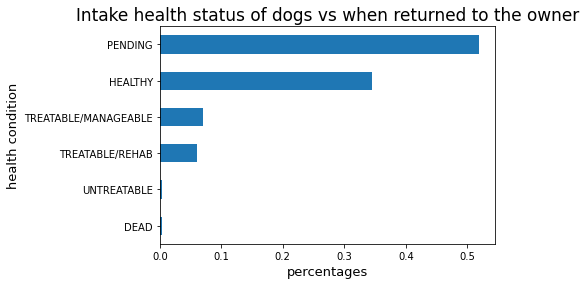

In [ ]:
df['Outcome Condition'][(df['Intake Condition']!="HEALTHY")&(df['Outcome Type']=="RETURN TO OWNER")&(df['Type']=="DOG")].value_counts(normalize=True,).sort_values(ascending=False).sort_values().plot.barh();
plt.title('Intake health status of dogs vs when returned to the owner', fontsize=17)
plt.xlabel('percentages', fontsize=13)
plt.ylabel('health condition', fontsize=13);

This graph tells us health condition of dogs that were not healthy when they came into the shelter and were returned to the owner.  

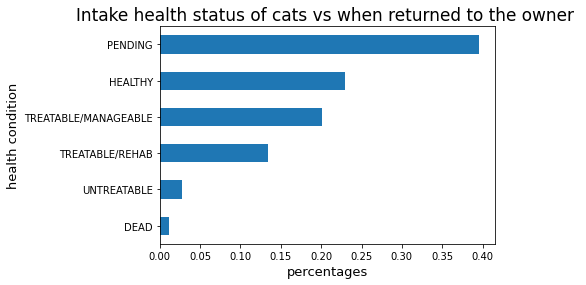

In [ ]:
df['Outcome Condition'][(df['Intake Condition']!="HEALTHY")&(df['Outcome Type']=="RETURN TO OWNER")&(df['Type']=="CAT")].value_counts(normalize=True,).sort_values(ascending=False).sort_values().plot.barh();
plt.title('Intake health status of cats vs when returned to the owner ',fontsize=17)
plt.xlabel('percentages',fontsize=13)
plt.ylabel('health condition',fontsize=13);


This graph tells us health condition of cats that were not healthy when they came into the shelter and were returned to the owner.   

subtypes, ex over the web. Knowing which way people are picking up their lost pet can be important for both the shelter and the pet owners.

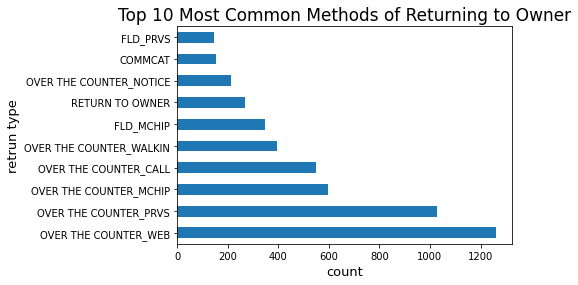

In [ ]:
returnOwner = df[df['Outcome Type'] == 'RETURN TO OWNER']

subtype10= returnOwner['Outcome Subtype'].value_counts()[0:10]
plt.title('Top 10 Most Common Methods of Returning to Owner', fontsize=17)
plt.xlabel('count',fontsize=13)
plt.ylabel('retrun type',fontsize=13)
subtype10.plot.barh();

Average days until the pet is picked up by thier owner? Ex. The average time someone picks up their pet is 18 days, this can help the shelter have a better idea whih are strays, and which are pets.

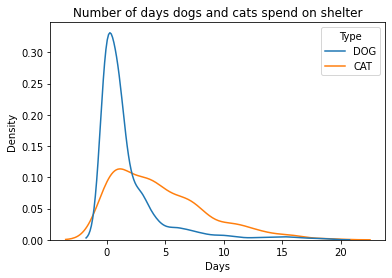

In [ ]:
def calculateDays(intakeD, outcomeD):
  d0 = date(intakeD.year, intakeD.month, intakeD.day)
  d1 = date(outcomeD.year, outcomeD.month, outcomeD.day)
  return int((d1-d0).days)
lost_pets_returned['Days in Shelter'] = lost_pets_returned.apply(lambda x: calculateDays(x['Intake Date'], x['Outcome Date']), axis=1)
lost_pets_returned = lost_pets_returned[lost_pets_returned['Days in Shelter']<20]
sns.kdeplot(lost_pets_returned['Days in Shelter'], hue='Type', data=lost_pets_returned, common_norm=False)
warnings.filterwarnings('ignore')
plt.title('Number of days dogs and cats spend on shelter')
plt.xlabel('Days')
plt.xticks(rotation = 0)
plt.ylabel('Density');

The number of days that dogs and cats spend in shelter seems to be different. The median stay for both is about 1 day. However, it's more common for dogs to be picked up sooner than cats.

## Conclusions



We have learned a plethora of facts from examining the data in the Sonoma Animal Shelter. After cleaning out the data of NA values, we learned that the Animal Shelter typically recieves more males than females, and more dogs than any other species of animal. Chihuahuas are the most popular breed of dog adoptions in numbers, but the highest rate of adoption of dogs for both color and breed were Black and Tan German Shepherds. For cats, Domestic Shorthairs were the most popular by far, and were exclusively chosen when they were kittens or small. For lost pets, the average amount of times a pet will be lost and retreived by the shelter is 3 times, and are typically found relatively healthy or pending. This may be worth exploring later to understand how the animals are rated on their condition. The most common way people find their lost pets are with the internet. While a majority of dogs spend very little time in the shelter, cats seem to stay longer in the shelter.


